# Exploratory Data Analysis (EDA)

In this section, we will perform an Exploratory Data Analysis (EDA) on the Human Resources dataset. EDA is a crucial step in the data analysis process, as it helps us understand the underlying patterns, detect anomalies, test hypotheses, and check assumptions through summary statistics and graphical representations. Let's dive into the data and uncover insights that will guide our further analysis.

In [1]:
# Importing the libraries
import os
import sys
import numpy as np
import pandas as pd
import seaborn as sns
import json
import matplotlib.pyplot as plt

In [2]:
base_dir = os.path.dirname(os.getcwd())
data_frame = pd.read_csv(os.path.join(base_dir, 'datasets', 'Cleaned_Human_Resources.csv'))
print("Number of rows: ",len(data_frame))
print('Number of columns: ',len(data_frame.columns))

Number of rows:  1470
Number of columns:  31


It is worth noting that the dataset has been cleaned and preprocessed. We have ensured that there are no missing values and have dropped columns with only one unique value. Additionally, categorical variables have been converted into numerical values for further analysis.

In [3]:
with open(os.path.join(base_dir, 'datasets', 'unique_elements.json')) as f:
    data_dict = json.load(f)

# Print the dictionary for categorical columns
for key in data_dict.keys():
    print(key, " : ", data_dict[key]) 

Attrition  :  {'0': 'No', '1': 'Yes'}
BusinessTravel  :  {'0': 'Travel_Rarely', '1': 'Travel_Frequently', '2': 'Non-Travel'}
Department  :  {'0': 'Sales', '1': 'Research & Development', '2': 'Human Resources'}
EducationField  :  {'0': 'Life Sciences', '1': 'Other', '2': 'Medical', '3': 'Marketing', '4': 'Technical Degree', '5': 'Human Resources'}
Gender  :  {'0': 'Female', '1': 'Male'}
JobRole  :  {'0': 'Sales Executive', '1': 'Research Scientist', '2': 'Laboratory Technician', '3': 'Manufacturing Director', '4': 'Healthcare Representative', '5': 'Manager', '6': 'Sales Representative', '7': 'Research Director', '8': 'Human Resources'}
MaritalStatus  :  {'0': 'Single', '1': 'Married', '2': 'Divorced'}
OverTime  :  {'0': 'No', '1': 'Yes'}


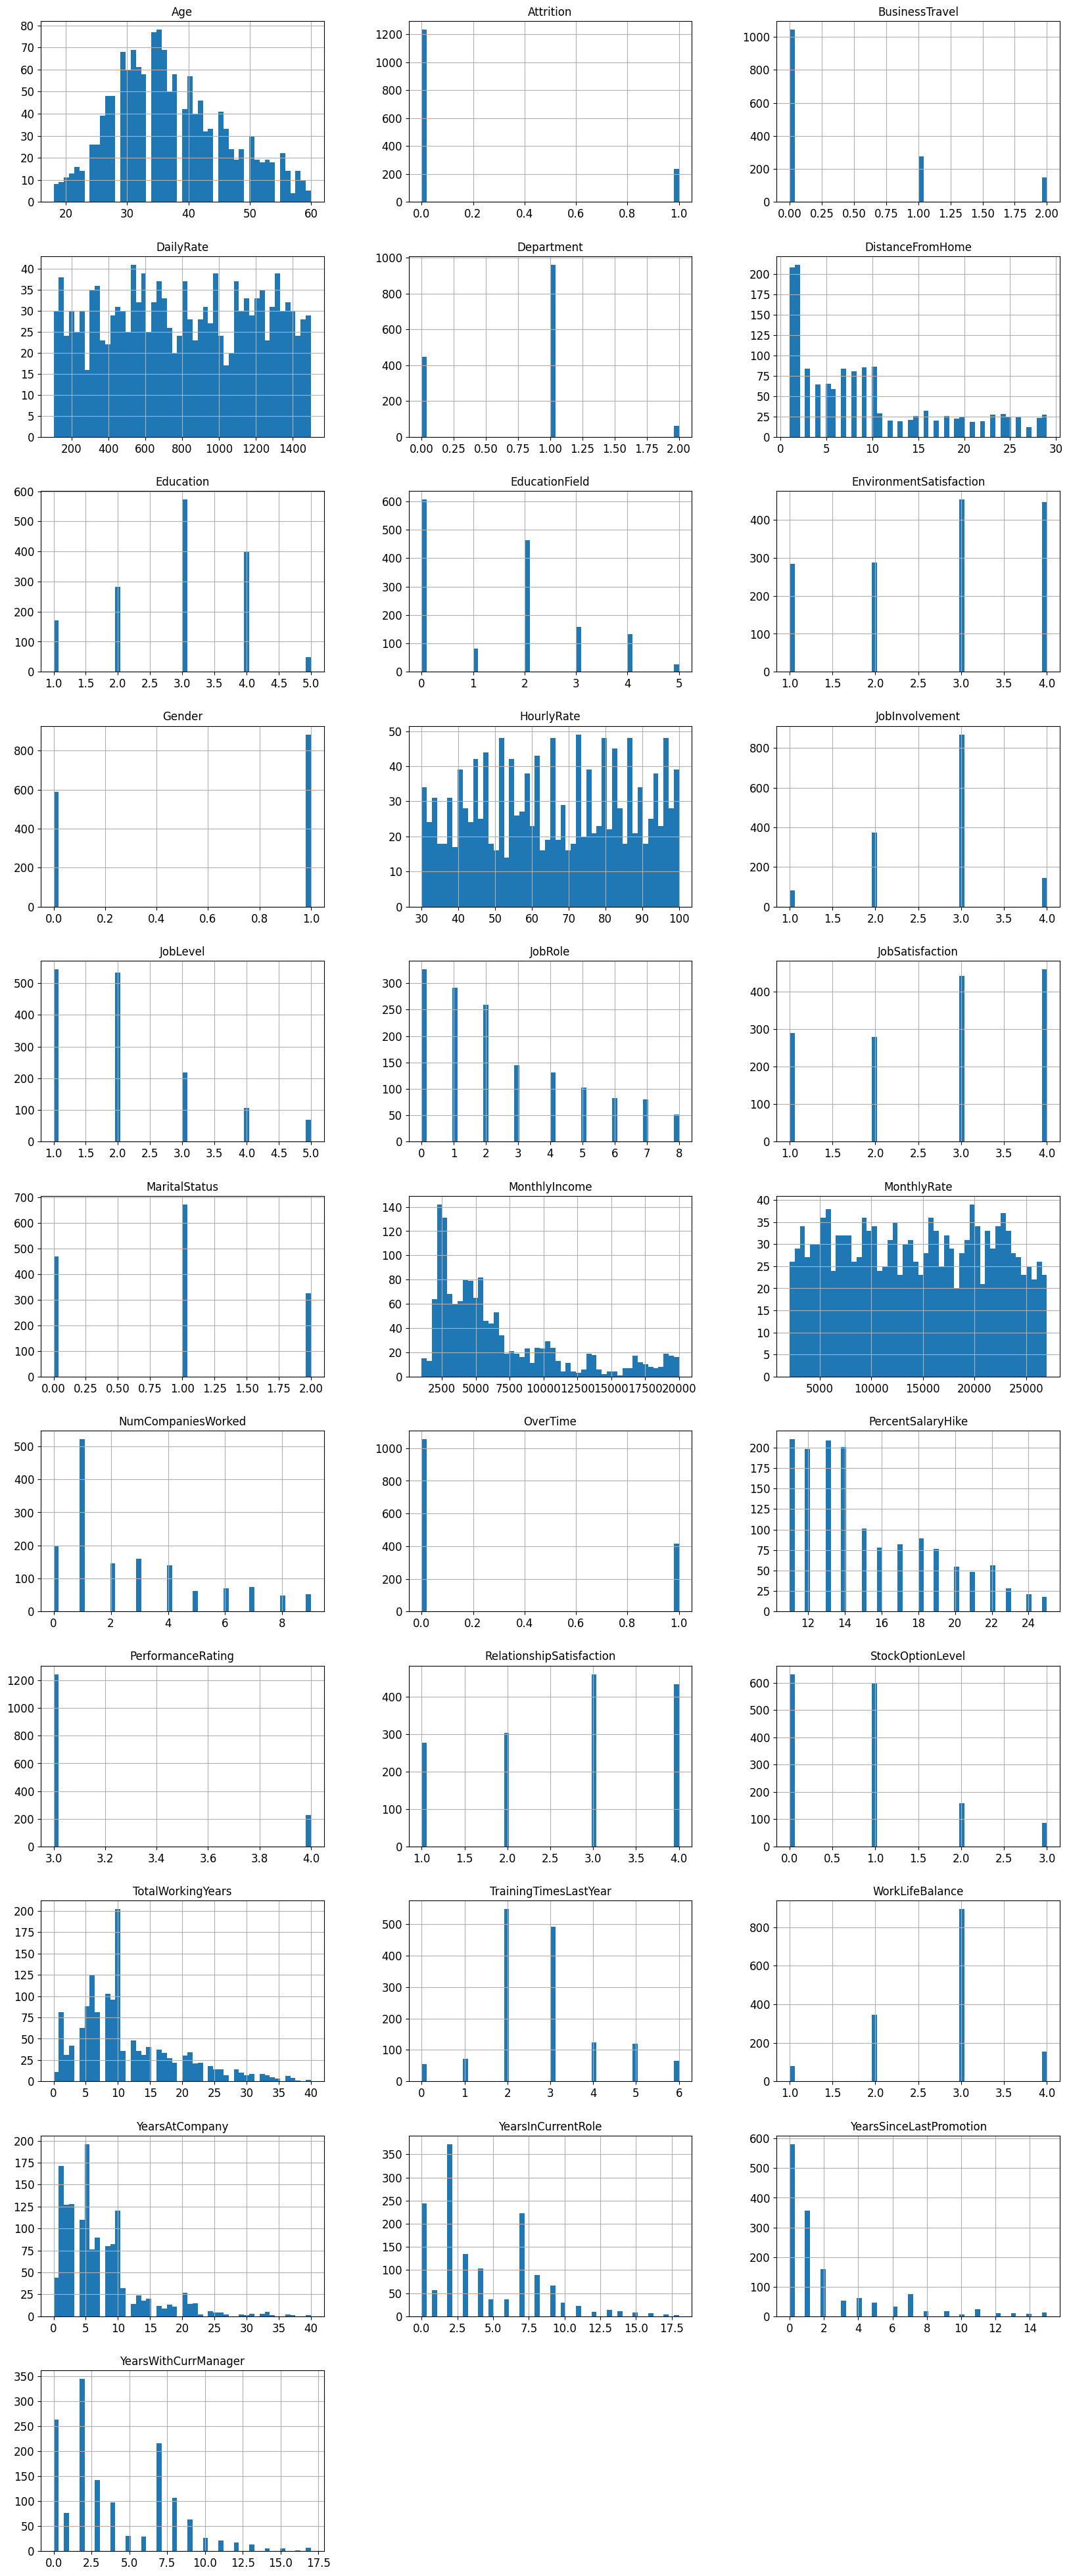

In [4]:
data_frame.hist(figsize=(20, 50), bins=50, xlabelsize=12, ylabelsize=12, layout=(int(np.ceil(data_frame.shape[1] / 3)), 3));

In [5]:
left_df = data_frame[data_frame['Attrition'] == 1]
stay_df = data_frame[data_frame['Attrition'] == 0]

print('Total of employees =', len(data_frame))
print('Number of employees who left:', len(left_df))
print('Number of employees who stayed:', len(stay_df))

Total of employees = 1470
Number of employees who left: 237
Number of employees who stayed: 1233


In [6]:
# Display the statistics of the employees who left
left_df.describe()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,237.000000,237.0,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,...,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000
mean,33.607595,1.0,0.392405,750.362869,0.662447,10.632911,2.839662,1.708861,2.464135,0.632911,...,3.156118,2.599156,0.527426,8.244726,2.624473,2.658228,5.130802,2.902954,1.945148,2.852321
std,9.689350,0.0,0.584062,401.899519,0.571186,8.452525,1.008244,1.558073,1.169791,0.483031,...,0.363735,1.125437,0.856361,7.169204,1.254784,0.816453,5.949984,3.174827,3.153077,3.143349
min,18.000000,1.0,0.000000,103.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,1.0,0.000000,408.000000,0.000000,3.000000,2.000000,0.000000,1.000000,0.000000,...,3.000000,2.000000,0.000000,3.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000
50%,32.000000,1.0,0.000000,699.000000,1.000000,9.000000,3.000000,2.000000,3.000000,1.000000,...,3.000000,3.000000,0.000000,7.000000,2.000000,3.000000,3.000000,2.000000,1.000000,2.000000
75%,39.000000,1.0,1.000000,1092.000000,1.000000,17.000000,4.000000,3.000000,4.000000,1.000000,...,3.000000,4.000000,1.000000,10.000000,3.000000,3.000000,7.000000,4.000000,2.000000,5.000000
max,58.000000,1.0,2.000000,1496.000000,2.000000,29.000000,5.000000,5.000000,4.000000,1.000000,...,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,15.000000,15.000000,14.000000


In [7]:
# Display the statistics of the employees who stayed
stay_df.describe()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1233.000000,1233.0,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,...,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000
mean,37.561233,0.0,0.392539,812.504461,0.754258,8.915653,2.927007,1.415247,2.771290,0.593674,...,3.153285,2.733982,0.845093,11.862936,2.832928,2.781022,7.369019,4.484185,2.234388,4.367397
std,8.888360,0.0,0.680200,403.208379,0.517973,8.012633,1.027002,1.401933,1.071132,0.491346,...,0.360408,1.071603,0.841985,7.760719,1.293585,0.681907,6.096298,3.649402,3.234762,3.594116
min,18.000000,0.0,0.000000,102.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,0.0,0.000000,477.000000,0.000000,2.000000,2.000000,0.000000,2.000000,0.000000,...,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.0,0.000000,817.000000,1.000000,7.000000,3.000000,2.000000,3.000000,1.000000,...,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,6.000000,3.000000,1.000000,3.000000
75%,43.000000,0.0,1.000000,1176.000000,1.000000,13.000000,4.000000,2.000000,4.000000,1.000000,...,3.000000,4.000000,1.000000,16.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000
max,60.000000,0.0,2.000000,1499.000000,2.000000,29.000000,5.000000,5.000000,4.000000,1.000000,...,4.000000,4.000000,3.000000,38.000000,6.000000,4.000000,37.000000,18.000000,15.000000,17.000000


#### Correlation Heatmap

The correlation heatmap below visualizes the relationships between different features in the dataset. Each cell in the heatmap shows the correlation coefficient between two variables. The values range from -1 to 1, where:

- **1** indicates a perfect positive correlation
- **-1** indicates a perfect negative correlation
- **0** indicates no correlation

This heatmap helps us understand which features are strongly correlated with each other, which can be useful for feature selection and understanding the underlying structure of the data.

<Axes: >

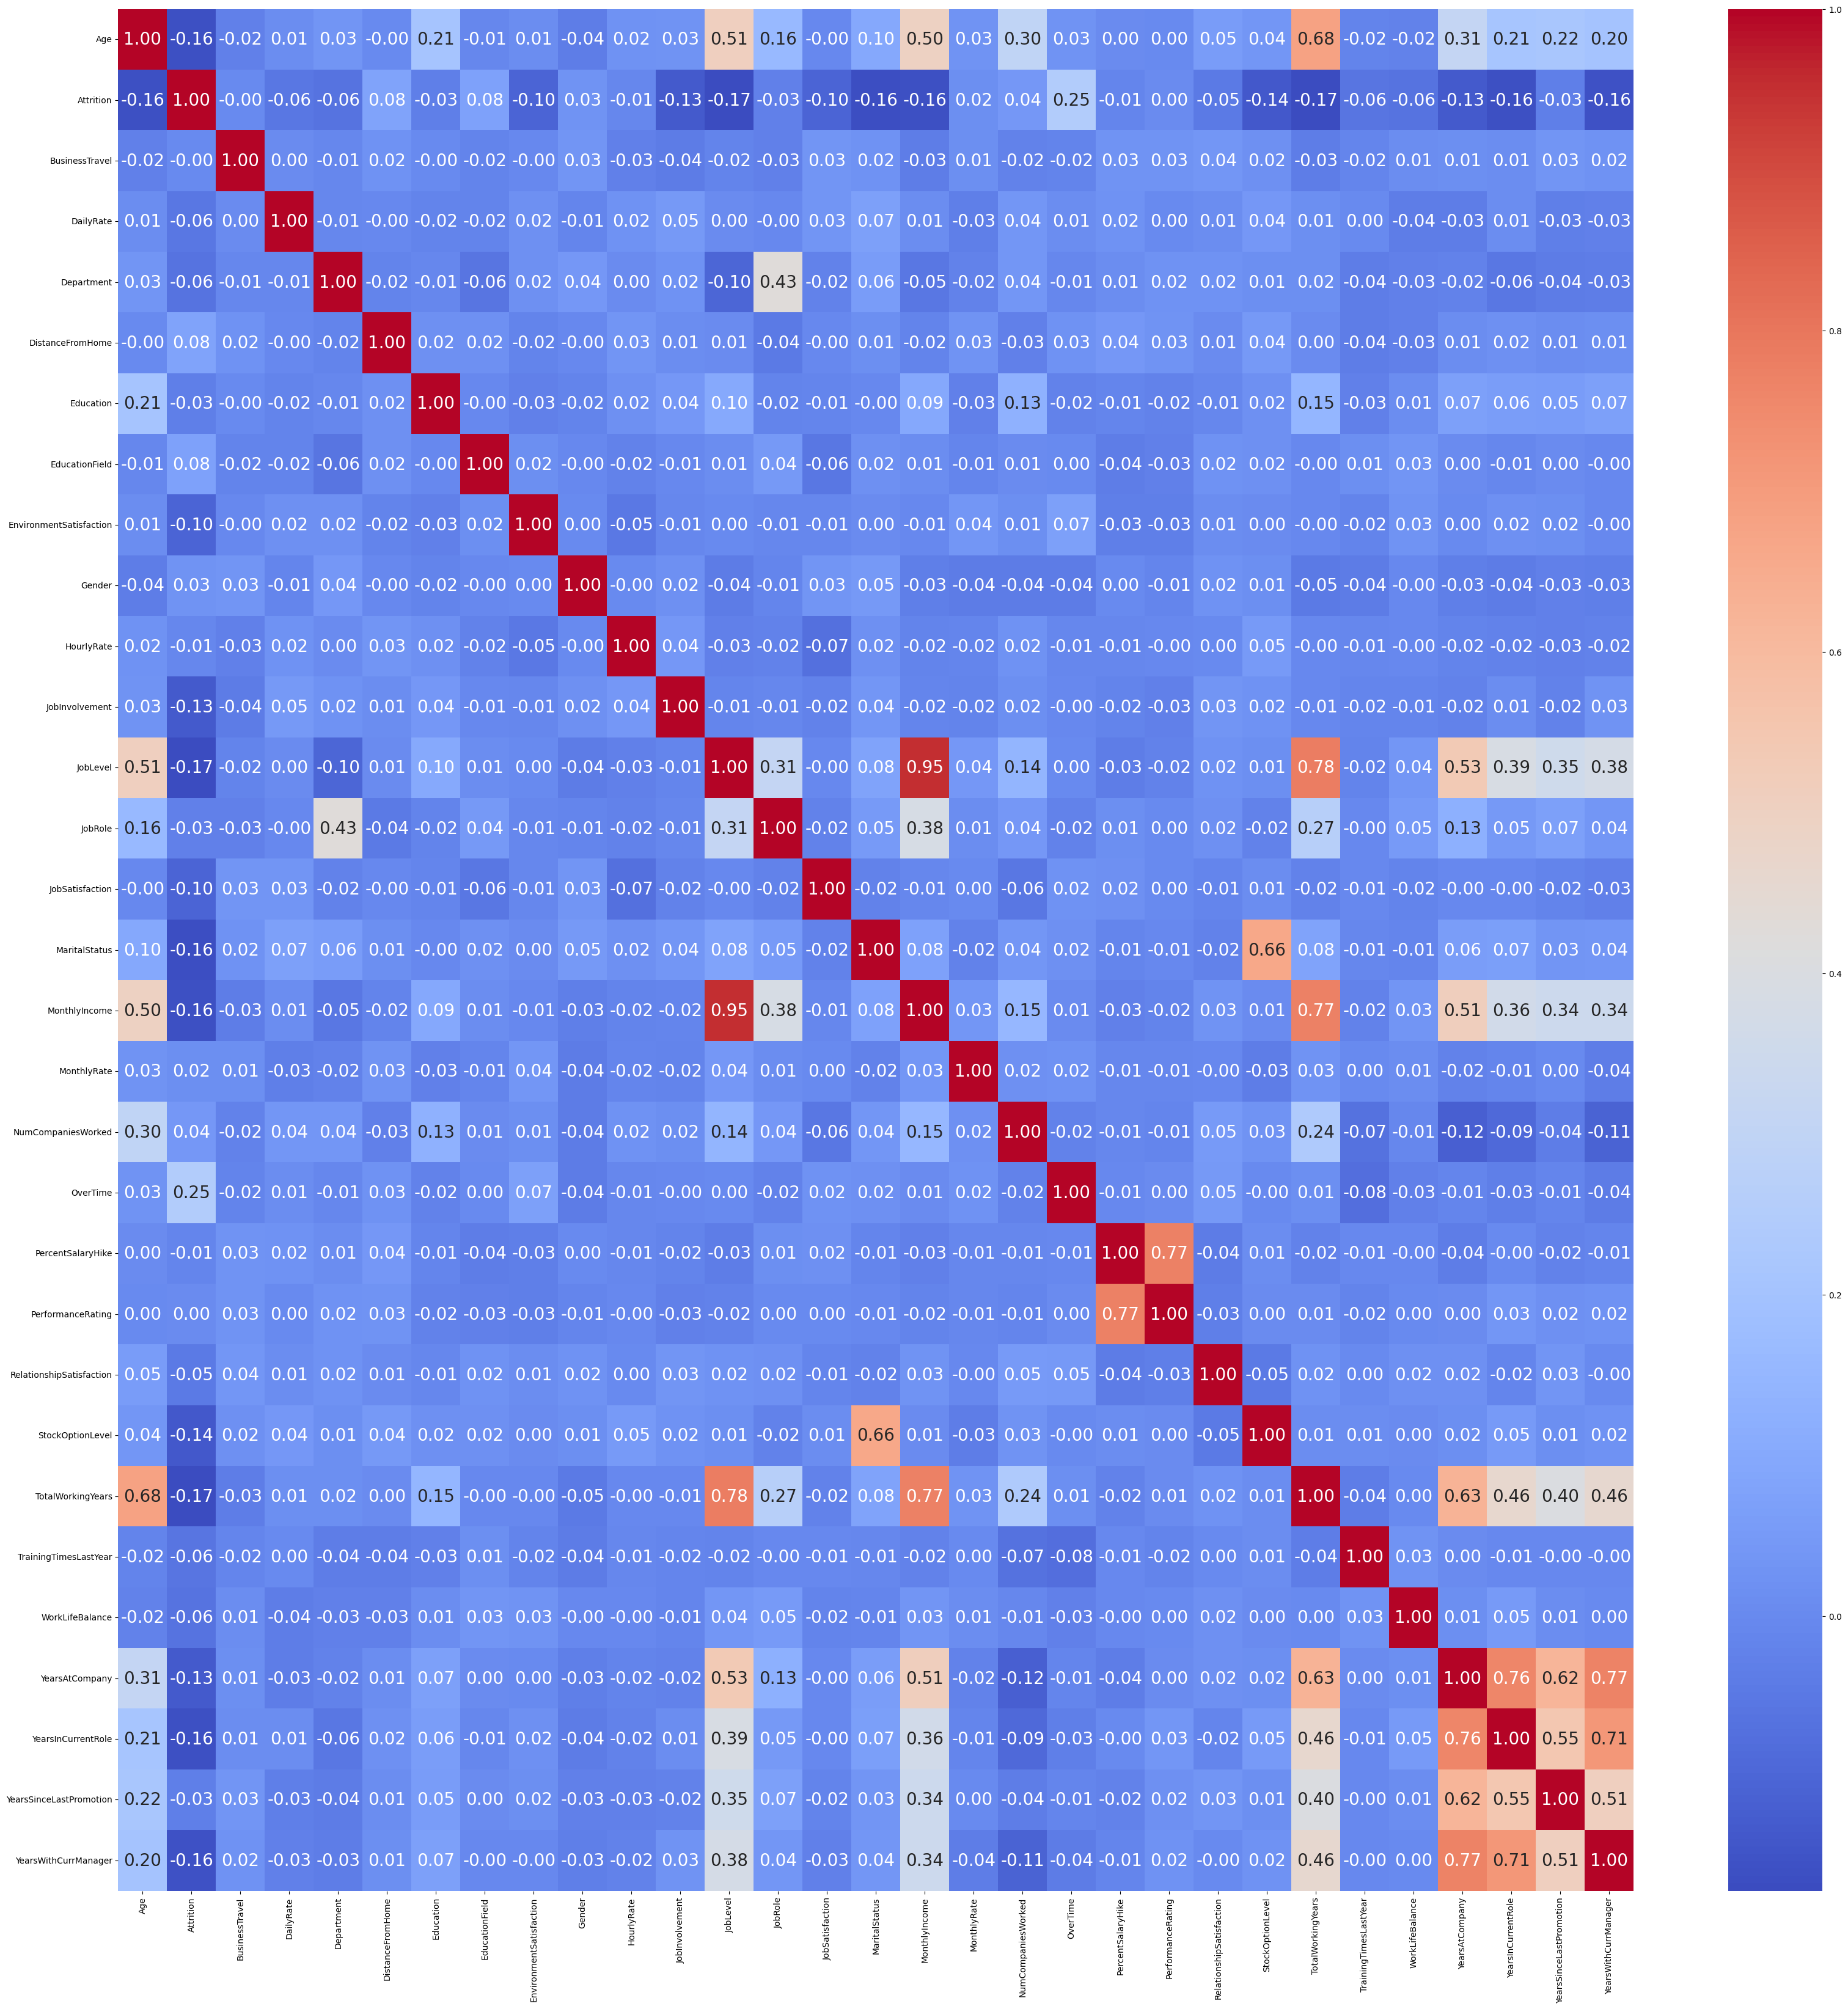

In [8]:
correlations = data_frame.corr()
f, ax = plt.subplots(figsize=(40, 40))
sns.heatmap(correlations, annot=True, cmap='coolwarm', fmt=".2f", ax=ax, annot_kws={"size": 20})

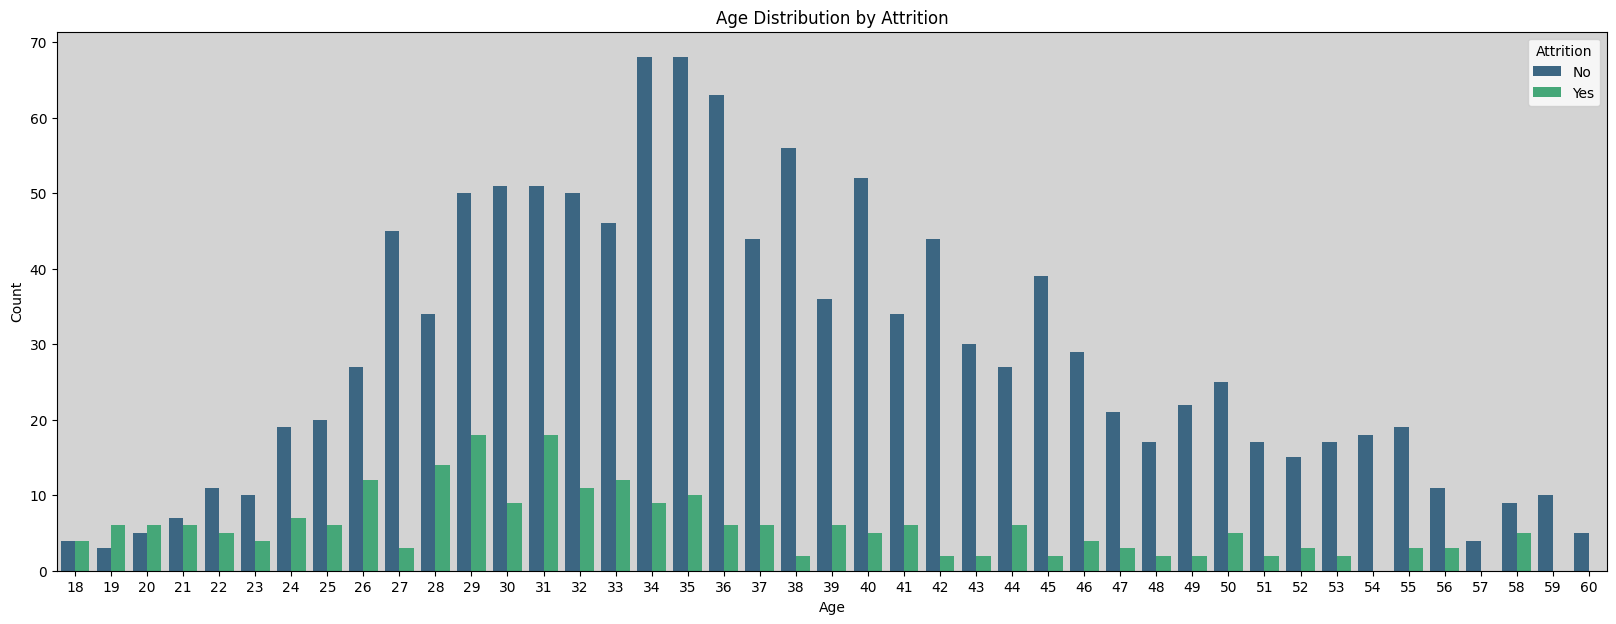

In [9]:
plt.figure(figsize=(20, 7))
ax = sns.countplot(x='Age', hue='Attrition', data=data_frame, palette='viridis')
ax.set_facecolor('lightgrey')
plt.title('Age Distribution by Attrition')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Attrition', labels=['No', 'Yes'])
plt.show()

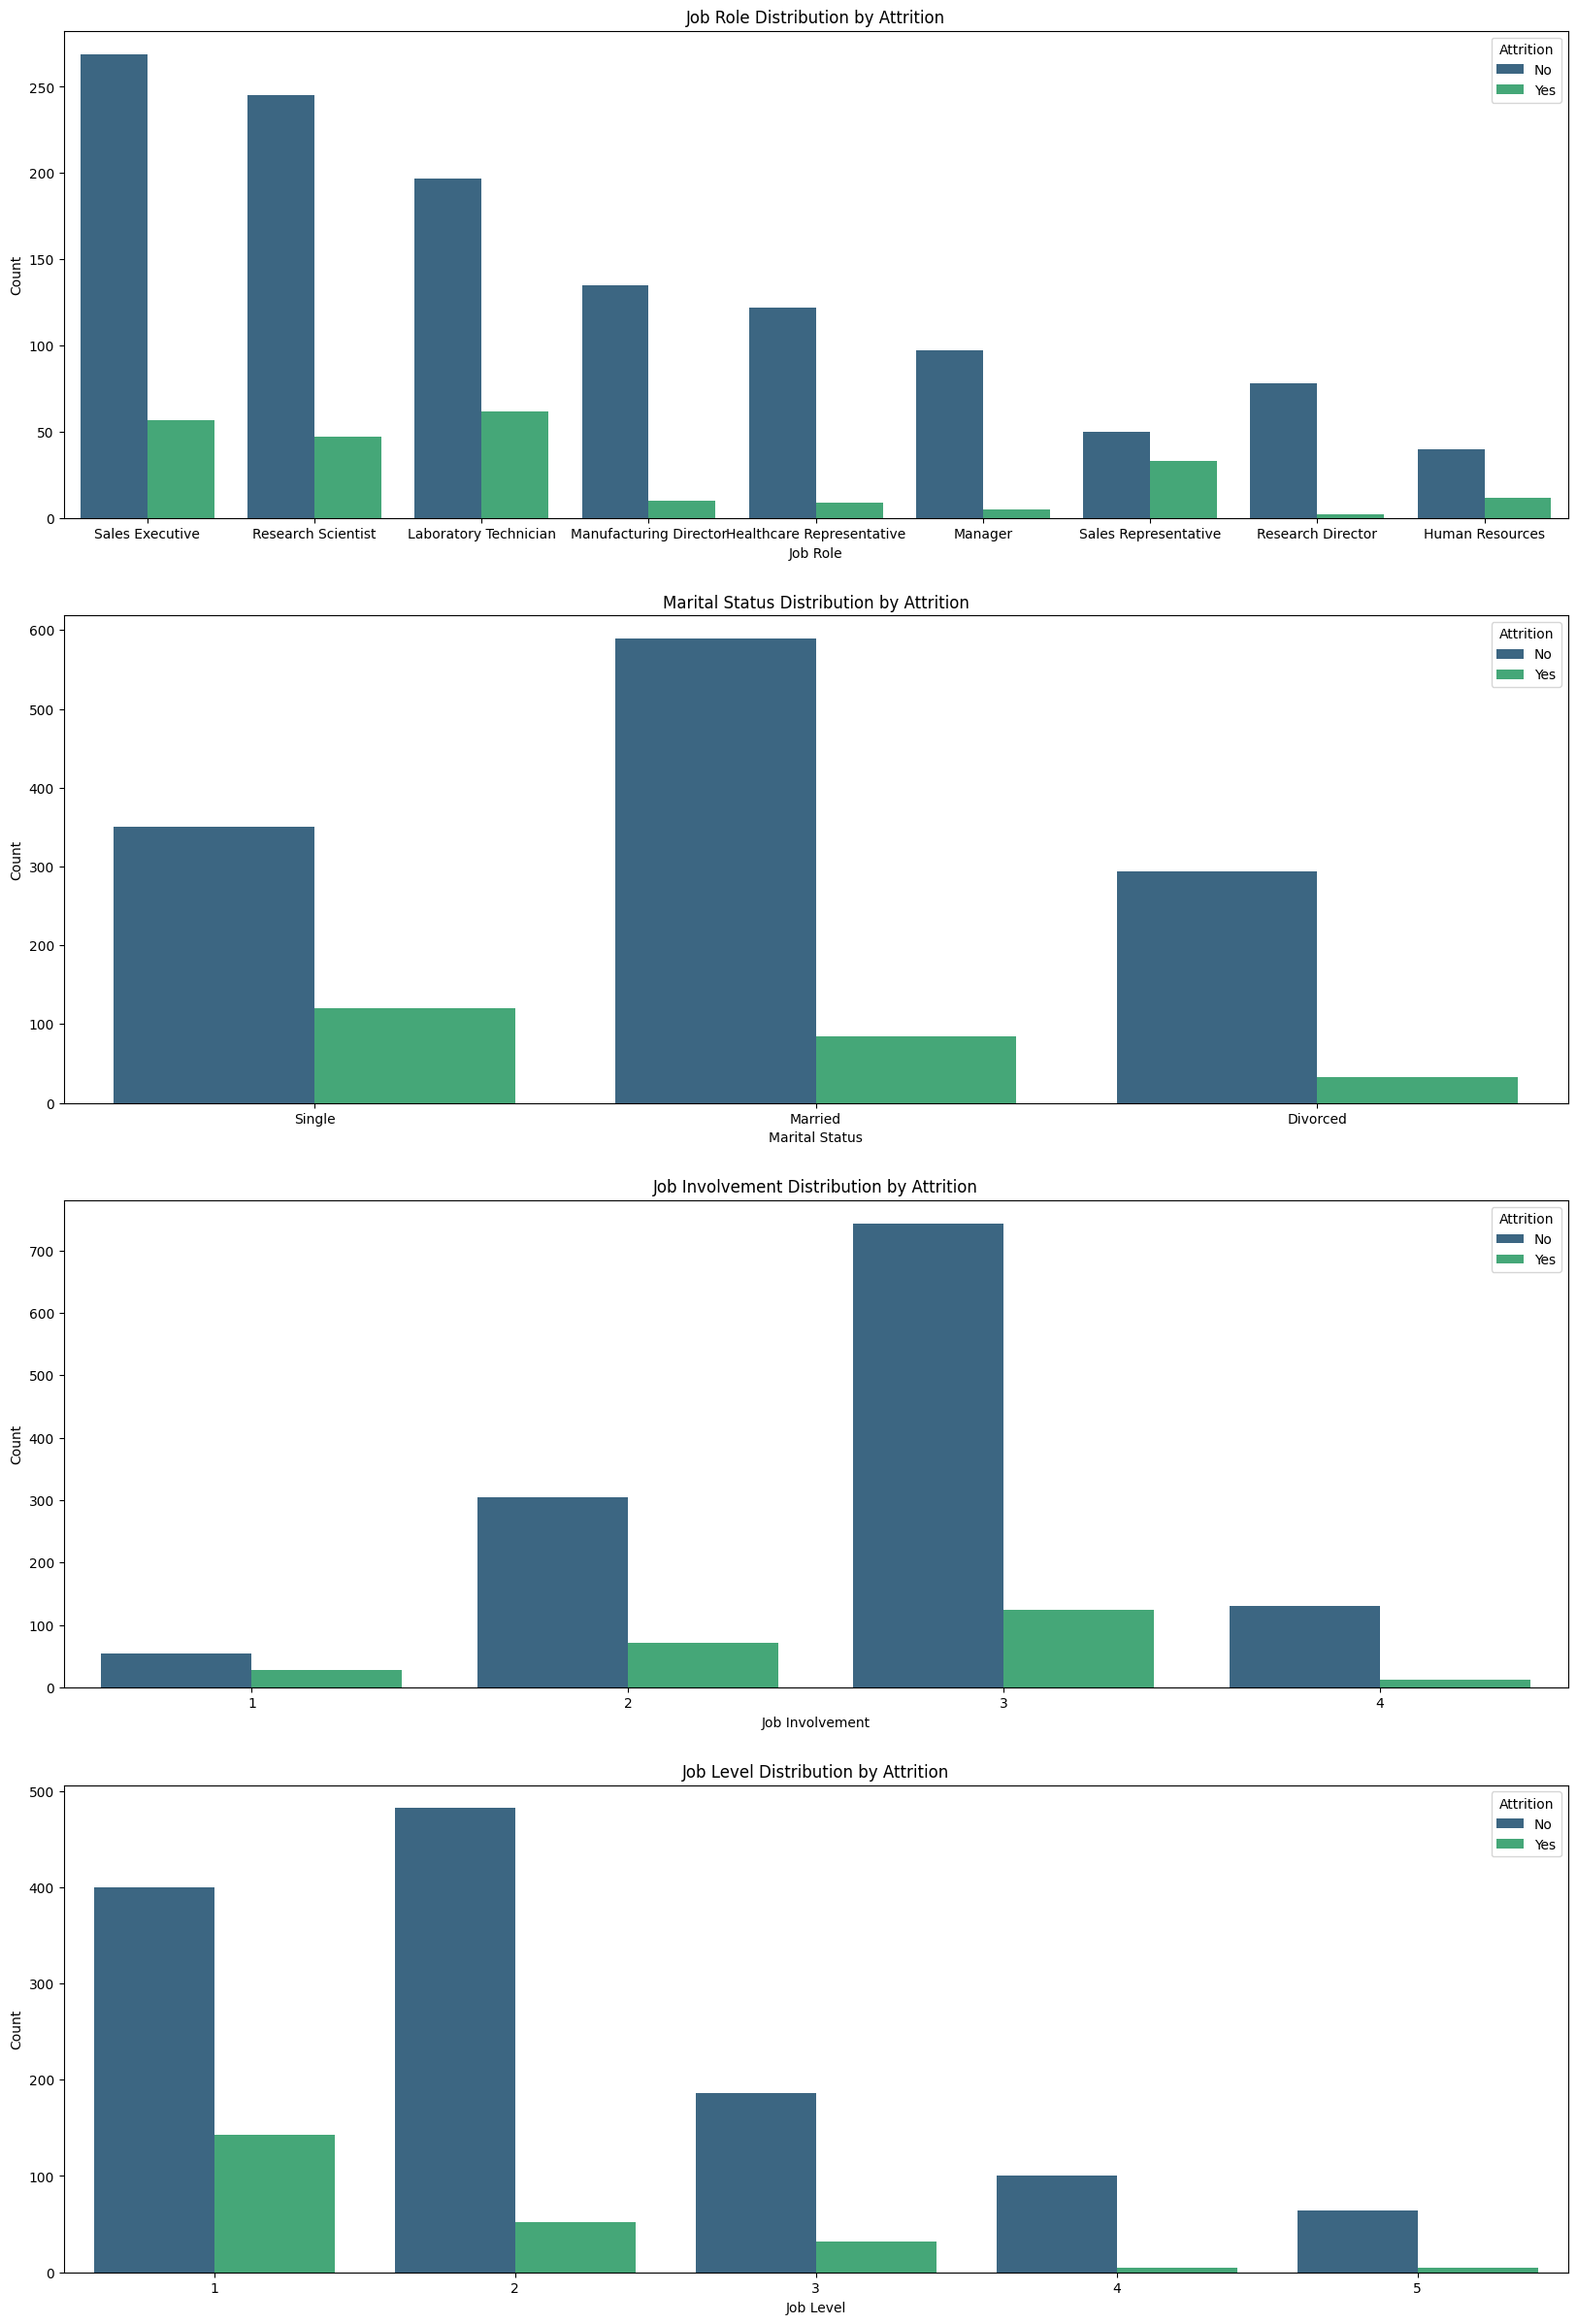

In [10]:
plt.figure(figsize=(20, 30))
plt.subplot(4, 1, 1)
sns.countplot(x='JobRole', hue='Attrition', data=data_frame, palette='viridis')
plt.title('Job Role Distribution by Attrition')
plt.xlabel('Job Role')
plt.ylabel('Count')
plt.legend(title='Attrition', labels=['No', 'Yes'])
plt.xticks(ticks=range(len(data_frame['JobRole'].unique())), labels=list(data_dict['JobRole'].values()))
plt.subplot(4, 1, 2)
sns.countplot(x='MaritalStatus', hue='Attrition', data=data_frame, palette='viridis')
plt.title('Marital Status Distribution by Attrition')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.legend(title='Attrition', labels=['No', 'Yes'])
plt.xticks(ticks=range(len(data_frame['MaritalStatus'].unique())), labels=list(data_dict['MaritalStatus'].values()))
plt.subplot(4, 1, 3)
sns.countplot(x='JobInvolvement', hue='Attrition', data=data_frame, palette='viridis')
plt.title('Job Involvement Distribution by Attrition')
plt.xlabel('Job Involvement')
plt.ylabel('Count')
plt.legend(title='Attrition', labels=['No', 'Yes'])
plt.subplot(4, 1, 4)
sns.countplot(x='JobLevel', hue='Attrition', data=data_frame, palette='viridis')
plt.title('Job Level Distribution by Attrition')
plt.xlabel('Job Level')
plt.ylabel('Count')
plt.legend(title='Attrition', labels=['No', 'Yes'])
plt.show()

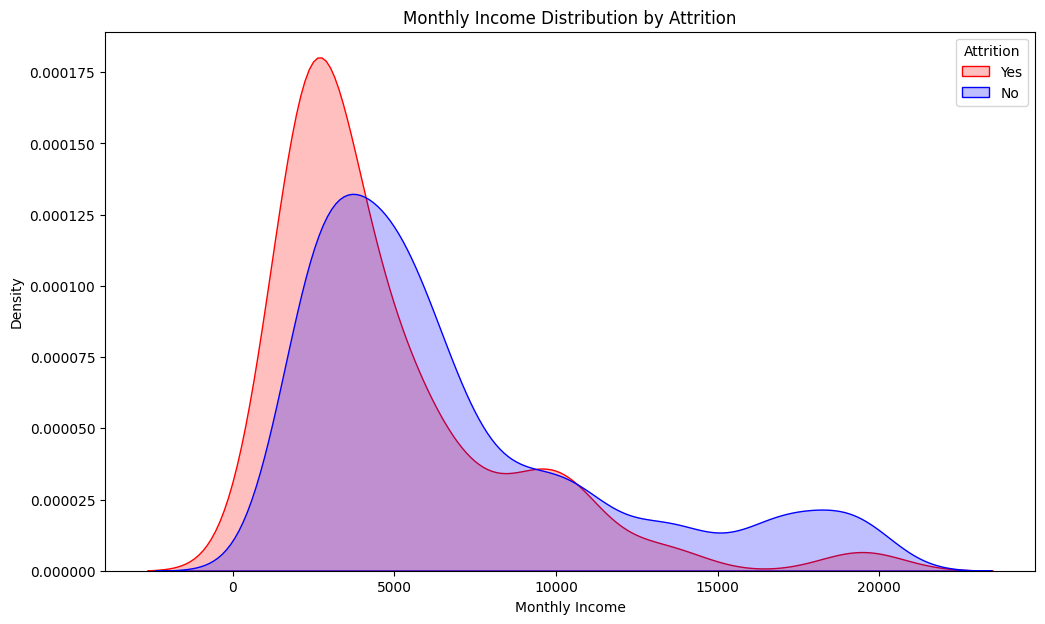

In [11]:
# Monthly Income Distribution by Attrition
plt.figure(figsize=(12, 7));
sns.kdeplot(left_df['MonthlyIncome'], label='Employees who left', fill=True, color='r');
sns.kdeplot(stay_df['MonthlyIncome'], label='Employees who stayed', fill=True, color='b');
plt.xlabel('Monthly Income');
plt.ylabel('Density');
plt.title('Monthly Income Distribution by Attrition');
plt.legend(title='Attrition', labels=['Yes', 'No']);
plt.show()

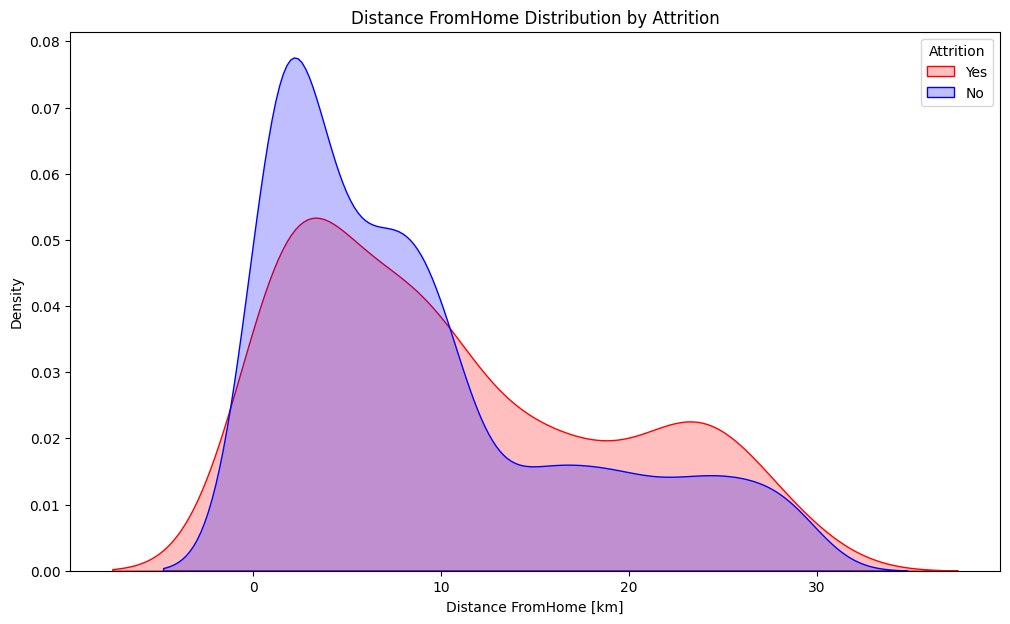

In [12]:
# Monthly Income Distribution by Attrition
plt.figure(figsize=(12, 7));
sns.kdeplot(left_df['DistanceFromHome'], label='Employees who left', fill=True, color='r');
sns.kdeplot(stay_df['DistanceFromHome'], label='Employees who stayed', fill=True, color='b');
plt.xlabel('Distance FromHome [km]');
plt.ylabel('Density');
plt.title('Distance FromHome Distribution by Attrition');
plt.legend(title='Attrition', labels=['Yes', 'No']);
plt.show()

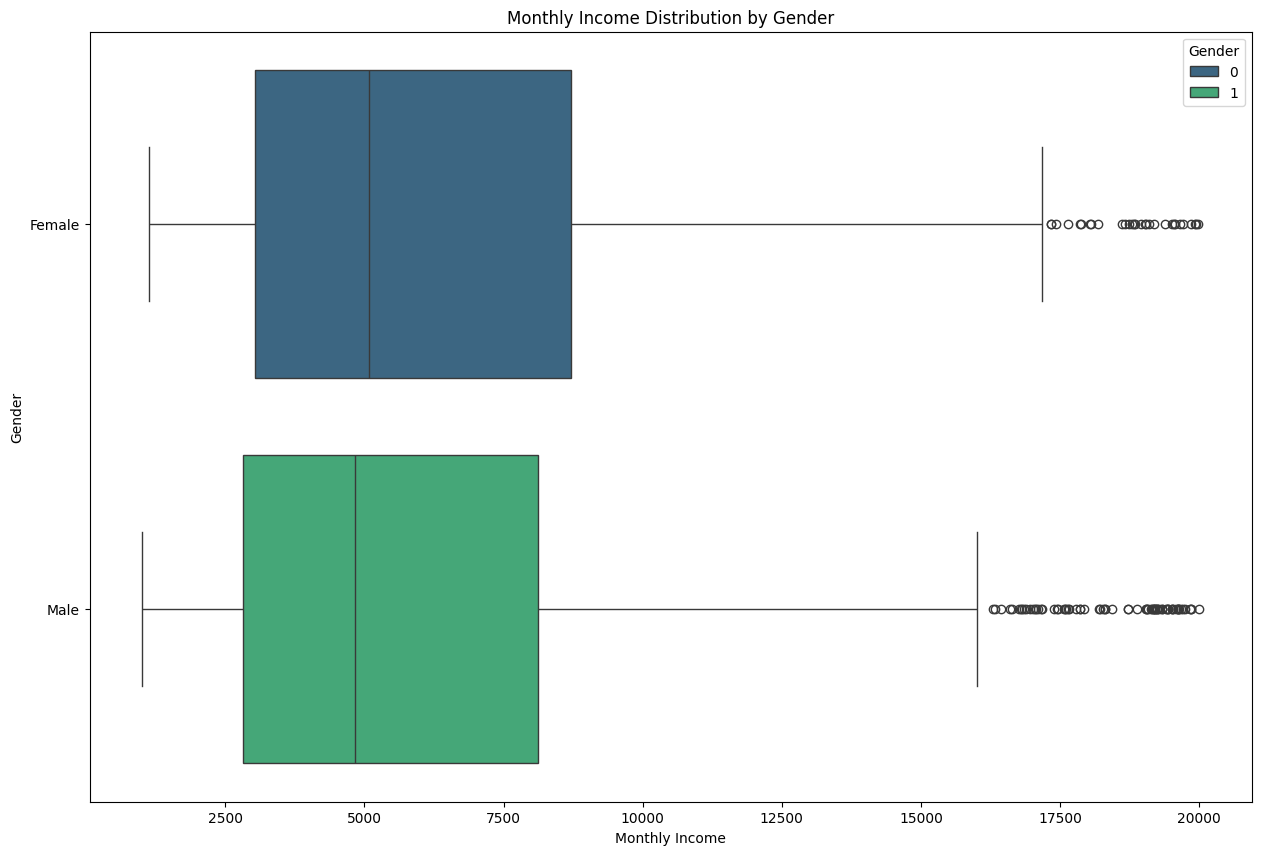

In [24]:
# Convert Gender to a categorical type if it's not already
data_frame['Gender'] = data_frame['Gender'].astype('category')

plt.figure(figsize=(15, 10))
sns.boxplot(x='MonthlyIncome', y='Gender', data=data_frame, palette='viridis', hue='Gender');
data_frame['Gender'] = data_frame['Gender'].astype('int');
plt.yticks(ticks=range(len(data_frame['Gender'].unique())), labels=list(data_dict['Gender'].values()));

plt.title('Monthly Income Distribution by Gender')
plt.xlabel('Monthly Income')
plt.ylabel('Gender')
plt.show()

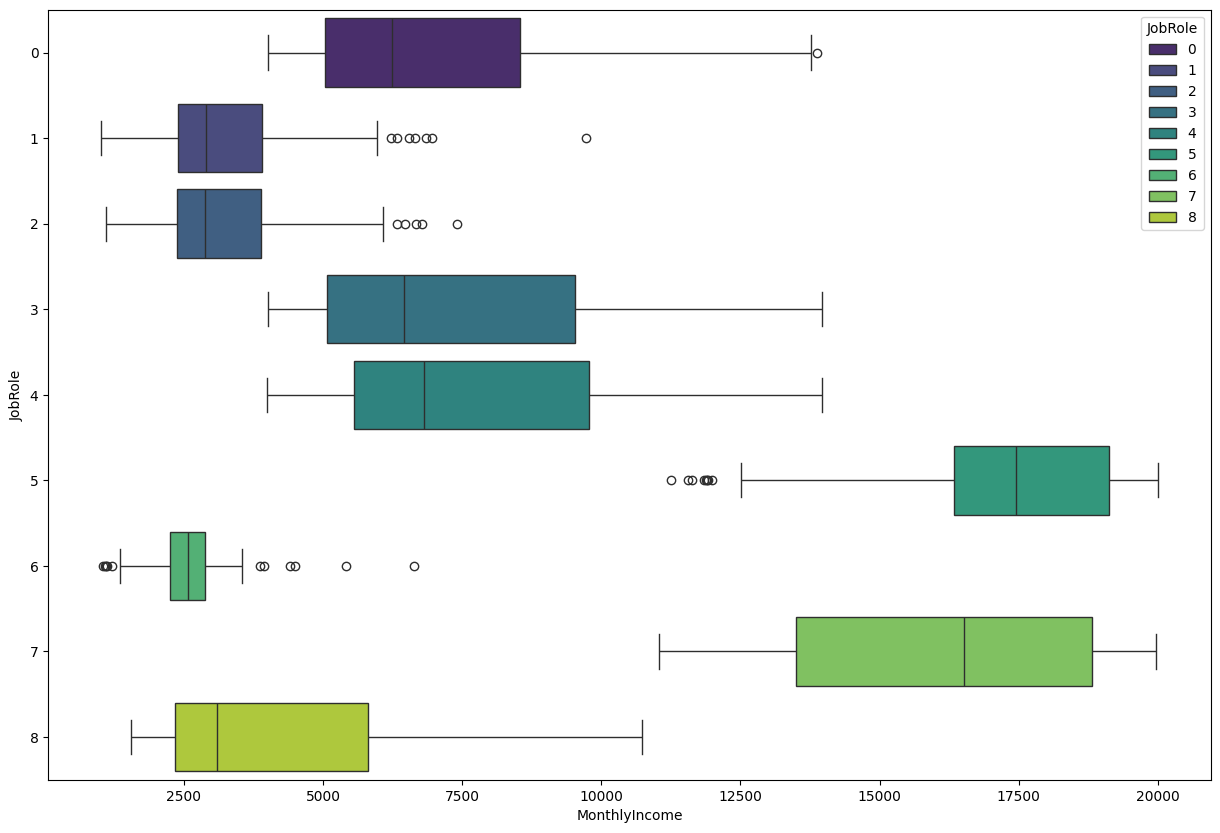

In [25]:
# Convert Gender to a categorical type if it's not already
data_frame['JobRole'] = data_frame['JobRole'].astype('category')

plt.figure(figsize=(15, 10))
sns.boxplot(x='MonthlyIncome', y='JobRole', data=data_frame, palette='viridis', hue='JobRole');
data_frame['JobRole'] = data_frame['JobRole'].astype('int');